In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys

# TODO: change this to the path to your homework folder
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'NLP /Final project/ChineseHumorSentiment-master/data'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'Shared drives', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))
# sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
import pandas as pd

In [ ]:
train_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_train_task2.csv",encoding='utf8')
test_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_test_task2.csv",encoding='utf8')
train_set = train_set.drop(columns=['id', 'Unnamed: 0'])
test_set = test_set.drop(columns=['id', 'Unnamed: 0'])

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## Preprocessing

In [ ]:
! pip install transformers

     |████████████████████████████████| 4.0 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 62.4 MB/s 
     |████████████████████████████████| 6.6 MB 61.8 MB/s 
     |████████████████████████████████| 895 kB 61.9 MB/s 
     |████████████████████████████████| 77 kB 8.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
train_set

,joke,label
0,请告诉我，史密斯先生，面试官问道，您还有什么其他您认为值得一提的技能吗？ 的确还有，应聘者谦...,1
1,一辆小汽车急速闯过红灯，刚好被警察拦住。 喂，你难道没有看见红灯吗？ 不，真对不起，我看到红...,1
2,教官子与县丞子厮打，教官子屡负，归而哭诉其母。母 曰：彼家终日吃肉，故恁般强健会打。你家终日...,0
3,经验是我们秃顶后大自然赋予我们的梳子。,1
4,正在进行中 - 它可能很慢，但它很稳定。请耐心等待。谢谢。,1
...,...,...
8995,一官员因贪污受贿被判刑，儿子探监时，说自己大学毕业找不到工作。 官员说：会有人来帮你的，我在...,1
8996,某医院急诊室送来一位病人，医生见病人痛得厉害，就给他服了一片止痛药，可是病人仍疼痛不止。 家...,2
8997,小学时候，每天出发前爸爸总会躺在床上提醒我： 校徽，红领巾，书包......天天被他说烦了，...,2
8998,法官问犯人：“你一点法律意识没有怎么不去学点法律知识啊？” 犯人答：“你当我傻啊！知法犯法―...,2


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

example_text = train_set.iloc[900, 0]
bert_input = tokenizer(example_text,padding='max_length', max_length = 300, 
                       truncation=True, return_tensors="pt")

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [ ]:
print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[ 101, 7370,  749,  689,  865, 1736,  672, 1912, 8024, 3680,  702,  782,
         6963,  833, 3119, 5815,  800, 3064, 4905, 4638,  691, 6205,  511,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,  

In [ ]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)

[CLS] 除 了 业 余 园 丁 外 ， 每 个 人 都 会 收 获 他 播 种 的 东 西 。 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [ ]:
import re
def custom_feature(text):
  feature1 = feature2 = feature3 = feature4 = feature5 = feature6 = feature7 = 0

  # if len(re.findall(r"爸|妈|婆|公|学生|老师｜医生｜律师｜家长｜阿凡提", text)) > 0:
  #   feature1 = 0.5
  # if len(re.findall(r"：｜:", text)) > 0:
  #   feature2 = 1.5
  # if len(re.findall(r"、", text)) > 0:
  #   feature3 = 1
  # if len(re.findall(r"？", text)) > 0:
  #   feature4 = 1
  # if len(re.findall(r"!|！", text)) > 0:
  #   feature5 = 1
  feature6 = np.float(len(text)/100)
  return np.array([feature6])

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
labels = {'true': 1,
          'false': 0
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [label for label in df['label']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 150, truncation=True,
                                return_tensors="pt") for text in df['joke']]
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]
    def get_batch_custom(self, idx):
        return self.custom_features[idx]
    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)
        return batch_texts, batch_y

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-chinese')
        # self.dropout = nn.Dropout(dropout)
        self.rnn = nn.LSTM(768, 200, num_layers = 3, device='cuda', batch_first=False, bidirectional=True)
        self.linear = nn.Linear(400, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        # dropout_output = self.dropout(pooled_output)
        # pooled_output = torch.cat((pooled_output, custom_feature.float().to('cuda')), axis=1)
        rnn_output, _ = self.rnn(pooled_output.view(len(pooled_output), 1, -1))
        linear_output = self.linear(rnn_output)
                final_layer = (linear_output).reshape((-1, 3))
        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import f1_score
def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate, weight_decay=1e-4)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, train_set, test_set, LR, EPOCHS)

In [ ]:
torch.save(model, "drive/Shared drives/NLP Final Project/Star_model/three_way_bert")

In [ ]:
model = torch.load("drive/Shared drives/NLP Final Project/Star_model/three_way_bert")

In [ ]:
from sklearn.metrics import f1_score
def evaluate(model, val_data):
  val = Dataset(val_data)
  val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  
  model = model.cuda()
  predict = []
  true = []
  with torch.no_grad():
    for val_input, val_label in val_dataloader:
      val_label = val_label.to(device)
      mask = val_input['attention_mask'].to(device)
      input_id = val_input['input_ids'].squeeze(1).to(device)
      
      output = model(input_id, mask)

      pred = output.argmax(dim=1).cpu().detach().numpy()
      predict.append(pred[0])
      predict.append(pred[1])
      true.append(val_label.cpu().detach().numpy()[0])
      true.append(val_label.cpu().detach().numpy()[1])
  print(f"f1_score: {f1_score(true, predict, average='macro')}")

In [ ]:
evaluate(model, test_set)

f1_score: 0.5213060091167706


In [ ]:
test_set

In [ ]:
pre_model = torch.load("drive/Shared drives/NLP Final Project/Star_model/three_way_bert")

In [ ]:
evaluate(pre_model, test_set)

In [ ]:
val = Dataset(test_set)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
  
model = model.cuda()
predict = []
true = []
with torch.no_grad():
  for val_input, val_label in val_dataloader:
      val_label = val_label.to(device)
      mask = val_input['attention_mask'].to(device)
      input_id = val_input['input_ids'].squeeze(1).to(device)
      
      output = model(input_id, mask)

      pred = output.argmax(dim=1).cpu().detach().numpy()
      predict.append(pred[0])
      predict.append(pred[1])
      true.append(val_label.cpu().detach().numpy()[0])
      true.append(val_label.cpu().detach().numpy()[1])

In [ ]:
confusion_mat = np.zeros((3, 3))
for i in range(len(true)):
  confusion_mat[true[i], predict[i]] += 1

In [ ]:
confusion_mat

array([[353.,  70., 177.],
       [140., 238., 222.],
       [156.,  91., 353.]])

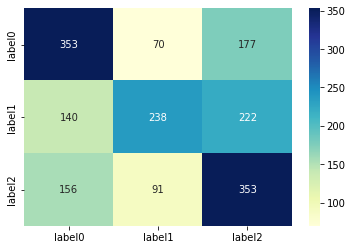

In [ ]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_test = true
predic = predict

columns = ['label0', 'label1', 'label2']

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="d")

,label0,label1,label2
label0,353,70,177
label1,140,238,222
label2,156,91,353
